 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set csv path and load the csv file
whale_path = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_path, index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [3]:
# Check if the file is loaded correctly
whale_returns.head(5)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [4]:
# Finding out the non-null count and datatype by using the .info() method.
whale_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [5]:
# Finding basic statistical data using .describe() method
whale_returns.describe()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
count                1059.000000         1059.000000   
mean                    0.000179           -0.000203   
std                     0.007842            0.006977   
min                    -0.032711           -0.032099   
25%                    -0.003594           -0.003961   
50%                     0.000467            0.000000   
75%                     0.004292            0.003567   
max                     0.042977            0.029338   

       TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
count                  1059.000000             1059.000000  
mean                     -0.000081                0.000501  
std                       0.010824                0.012831  
min                      -0.139820               -0.066505  
25%                      -0.004746               -0.005515  
50%                       0.000232                0.000617  
75%                       0.005176                0.007516  
max                       0.080705                0.061341

In [6]:
# Check for any missing data
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# There is one missing data for each column. Use dropna to drop the missing data
whale_returns.dropna(inplace = True)

In [8]:
# Check if all the null values are deleted
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
# Check cleaned data
whale_returns.head(5)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [10]:
# Set csv path and load the csv file
algo_path = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_path, index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [11]:
# Check if the file is loaded correctly
algo_returns.head(5)

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [12]:
# Finding out the non-null count and datatype by using the .info() method
algo_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [13]:
# Finding basic statistical data using .describe() method
algo_returns.describe()

Algo 1       Algo 2
count  1241.000000  1235.000000
mean      0.000667     0.000341
std       0.007972     0.008466
min      -0.030951    -0.036937
25%      -0.003238    -0.003733
50%       0.000135     0.000581
75%       0.003978     0.005194
max       0.098246     0.083734

In [14]:
# Check for any missing data
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [15]:
# Dropna to clean data
algo_returns.dropna(inplace = True)

In [16]:
# Check to see if null values are dropped properly
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [17]:
# Check cleaned data
algo_returns.head(5)

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [18]:
# Set csv path and load csv file
snp_path = Path('Resources/sp_tsx_history.csv')
snp_tsx_60_returns = pd.read_csv(snp_path, index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [19]:
# Check to see if csv file was loaded correctly
snp_tsx_60_returns.head(5)

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [20]:
# Check non-null counts and datatypes using .info() method
snp_tsx_60_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


**The S&P TSX 60 values have the datatype of object. Therefore, we will have to convert it to number types (floats or int)**

In [21]:
# Finding basic statistical data using .describe() method
snp_tsx_60_returns.describe()

Close
count         1818
unique        1814
top     $16,074.30
freq             2

In [22]:
# Close data has $ and , signs which makes it unable to convert its data type to float. 
# Get rid of them and change Close column type to float
snp_tsx_60_returns['Close'] = snp_tsx_60_returns['Close'].str.replace('$', '').str.replace(',', '').astype(float)

In [23]:
# Create a new column called 'S&P TSX' that shows the daily return of S&P TSX 60
snp_tsx_60_returns['S&P TSX'] = snp_tsx_60_returns['Close'].pct_change()

In [24]:
# Check for null data
snp_tsx_60_returns.isnull().sum()

Close      0
S&P TSX    1
dtype: int64

In [25]:
# Drop null data
snp_tsx_60_returns.dropna(inplace = True)

In [26]:
# Check to see if null data are correctly cleared
snp_tsx_60_returns.isnull().sum()

Close      0
S&P TSX    0
dtype: int64

In [27]:
# Close column is not needed anymore so remove it
snp_tsx_60_returns.drop(['Close'], axis = 1, inplace = True)

In [28]:
# Check cleaned data
snp_tsx_60_returns.head()

S&P TSX
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [29]:
# Merge all the cleaned dataframes into one and call it 'combined_df'
combined_df = pd.merge(left = whale_returns, right = algo_returns, how = 'inner', left_index = True, right_index = True)
combined_df = pd.merge(left = combined_df, right = snp_tsx_60_returns, how = 'inner', left_index = True, right_index = True)

In [30]:
# Check to see if merge was performed properly
combined_df.head(5)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P TSX  
Date                            
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.002416 -0.003371  
2015-03-05  0.004323  0.001344  
2015-03-06 -0.011460 -0.009972  
2015-03-09  0.001303 -0.006555

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [31]:
# Created a function called graph_maker which will plot graph using the date parameters. 
def graph_maker(df, start_date = '2015-03-03', end_date = '2019-05-01'):
    lst = list(df.columns)
    plt.figure(figsize = [30,15])
    for i in lst:
        plt.plot(df[i][start_date:end_date])
    plt.title(input('Title of the graph:'), fontdict = {'fontsize': 30, 'fontweight': 'bold'})
    plt.legend(labels = lst)
    plt.xlabel(input('X label:'), fontdict = {'fontsize': 15})
    plt.ylabel(input('Y label:'), fontdict = {'fontsize': 15})


Title of the graph: Daily returns of portfolios and S&P TSX 60
X label: Date
Y label: Daily return


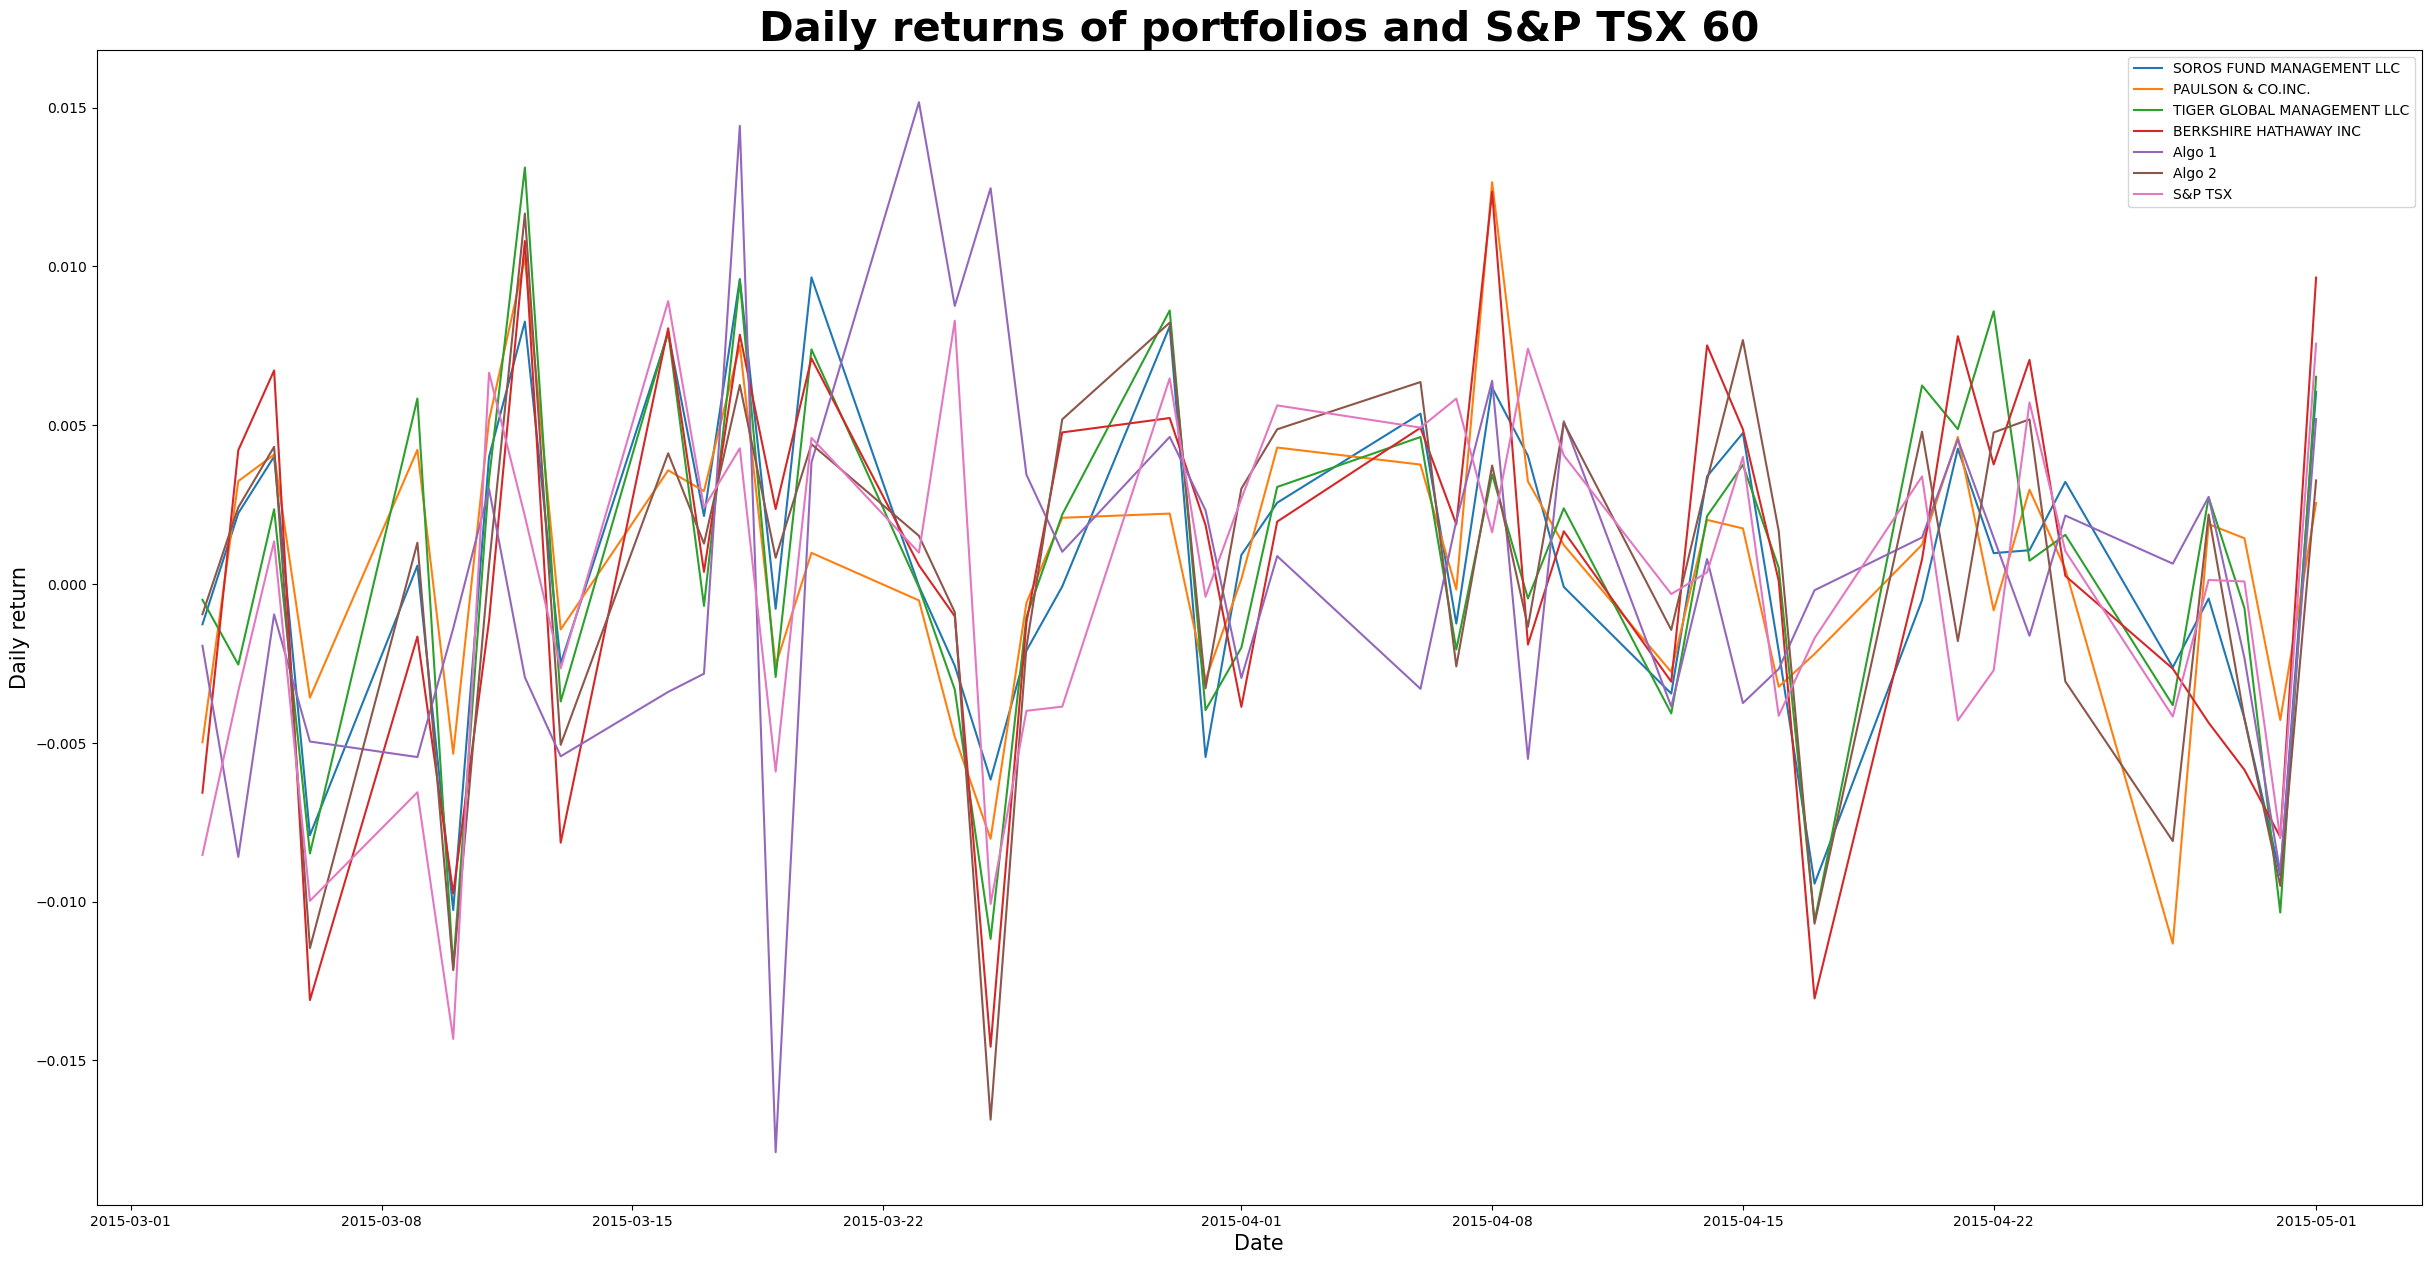

In [32]:
# Plot daily returns of all portfolios
graph_maker(combined_df, '2015-03-03', '2015-05-01')

#### Calculate and Plot cumulative returns.

In [33]:
# Created a function called cumprod_graph_maker which will plot cumulative returns using the date parameters.       
def cumprod_graph_maker(df, start_date = '2015-03-03', end_date = '2019-05-01'):
    lst = list(df.columns)
    plt.figure(figsize = [30,15])
    for i in lst:
        new_df = df.copy()
        plt.plot(new_df[i][start_date:end_date].add(1).cumprod())
    plt.legend(labels = lst)
    plt.title(input('Title of the graph:'), fontdict = {'fontsize': 30, 'fontweight': 'bold'})
    plt.xlabel(input('X label:'), fontdict = {'fontsize': 15})
    plt.ylabel(input('Y label:'), fontdict = {'fontsize': 15})

Title of the graph: Cumulative returns of portfolios and S&P TSX 60
X label: Date
Y label: Cumulative return


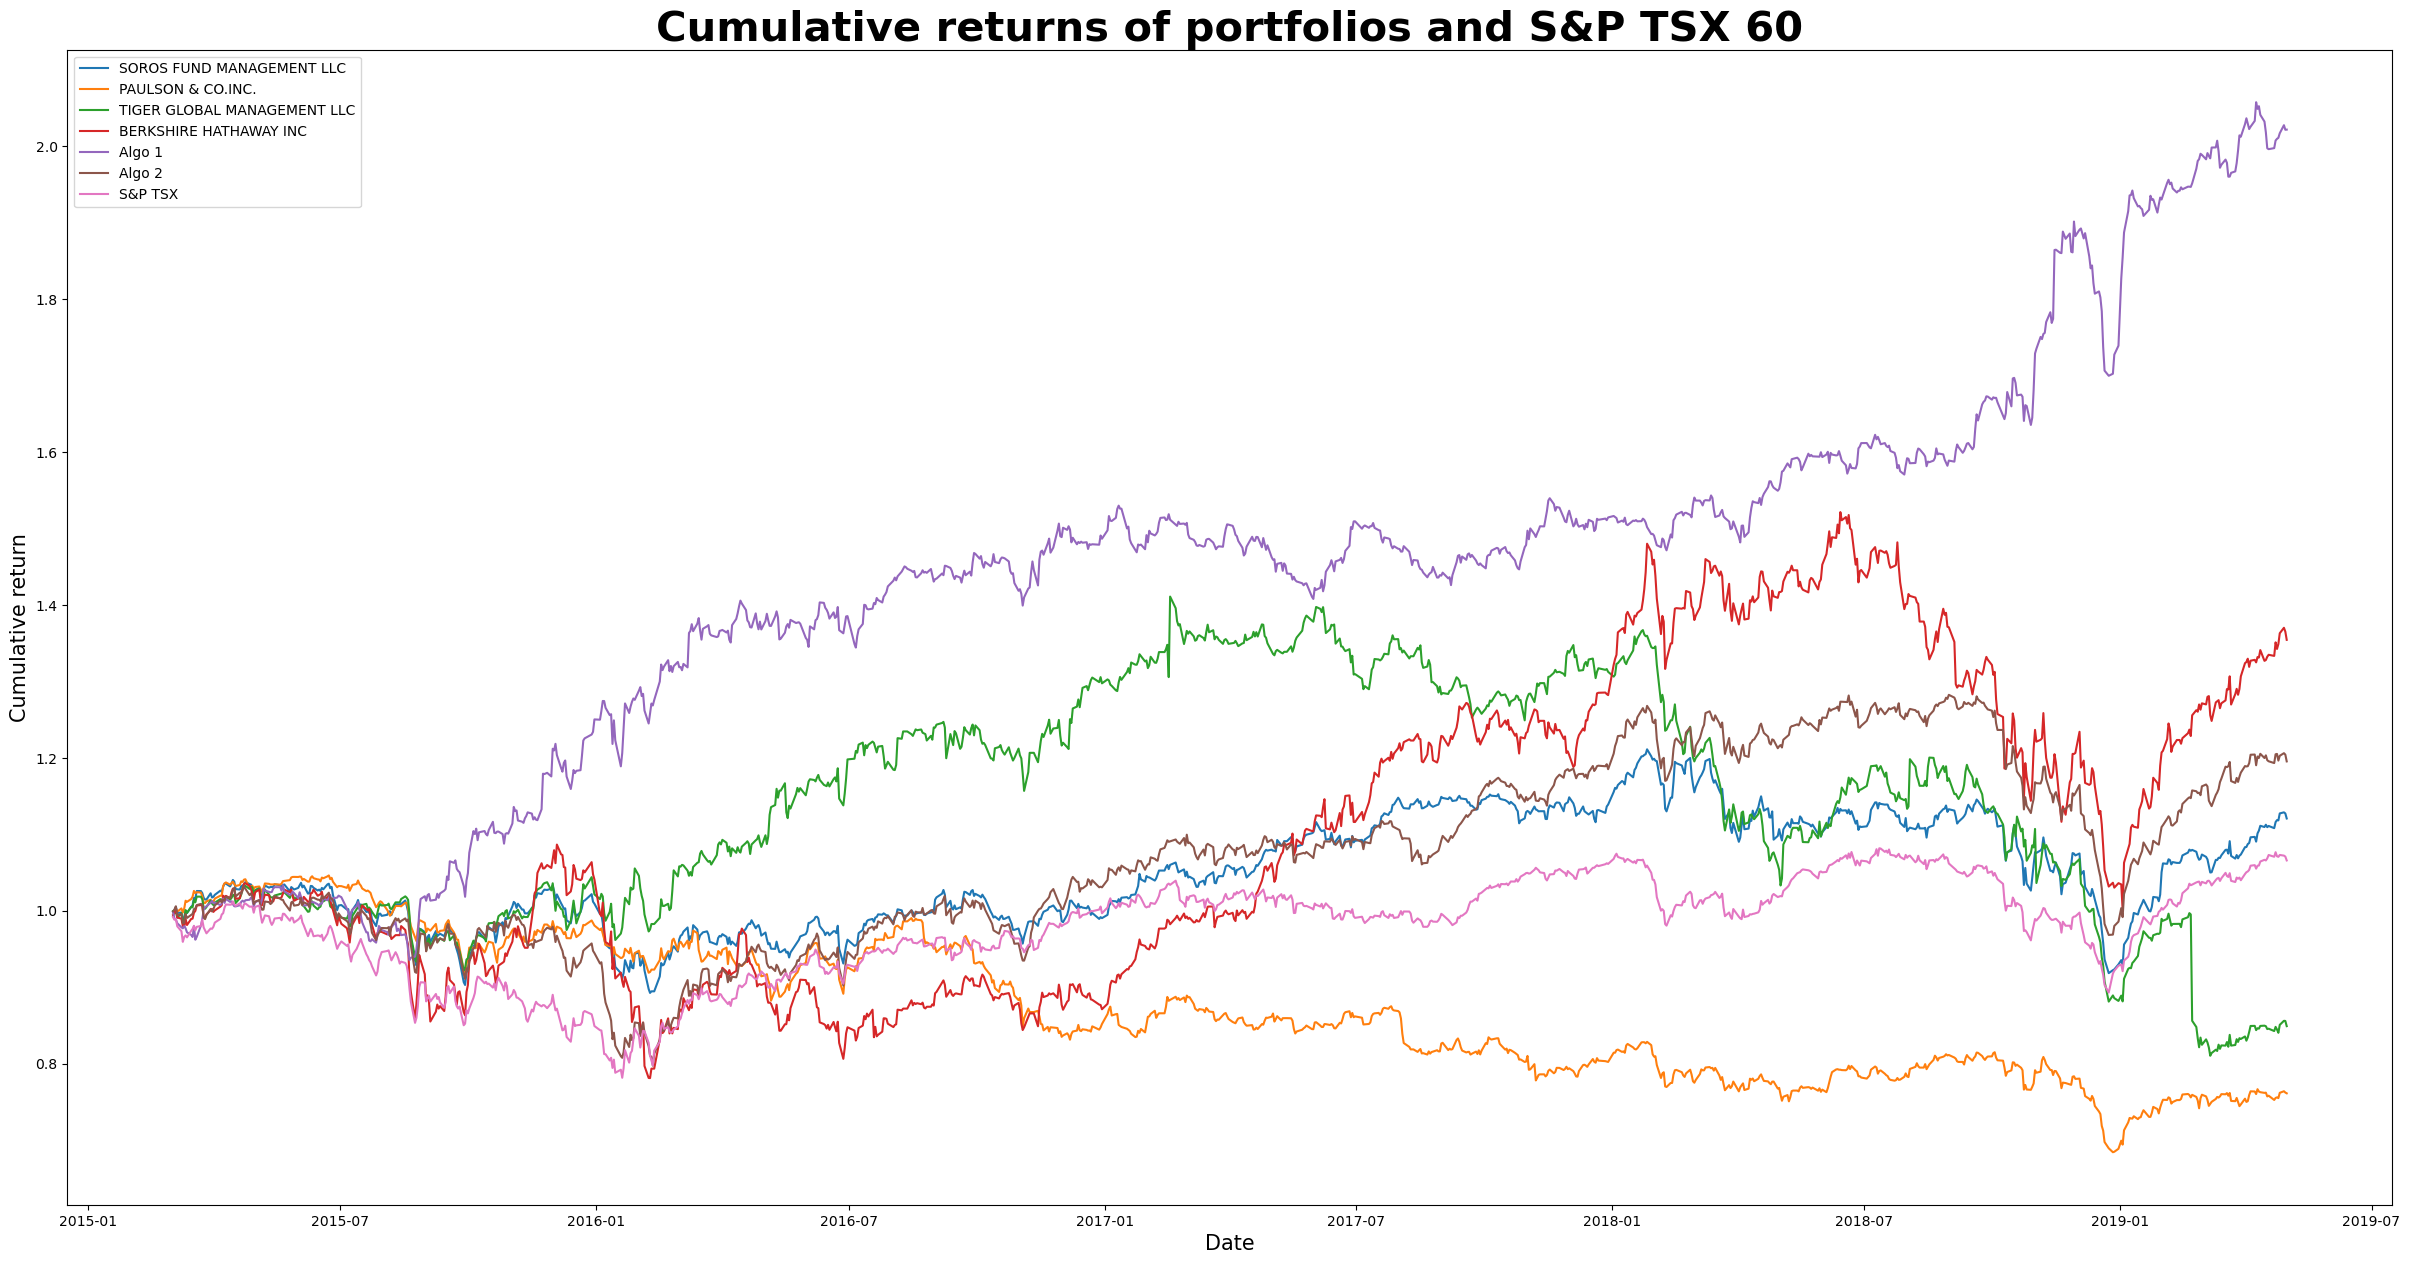

In [34]:
# Plot cumulative returns
cumprod_graph_maker(combined_df, '2015-03-03', '2019-05-01')

**Based on cumulative return graph, for the period of 2015-03-03 to 2019-05-01, Soros fund management, Berkshire Hathaway Inc, Algo 1, and Algo 2 outperformed S&P TSX 60.
Algo 1 had the best cumulative return out of all the portfolios.**

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [35]:
# Created a function called boxplot_maker which will plot boxplots for each portfolios
# Tried to plot 3 boxplots per row, and have shared y axis so that they can be visually compared to each other
def boxplot_maker(df):
    lst = list(df.columns)
    count = 0
    extra_row = False
    if len(lst) % 3 == 0:
        n_row = len(lst) / 3
    else:
        n_row = (len(lst) // 3) + 1
        extra_row = True
    fig, axs = plt.subplots(nrows = n_row, ncols = 3, figsize = (27, n_row * 2), sharex = True)
    for i in range(n_row):
        for j in range(3):
            axs[i,j].boxplot(df[lst[count]], vert = False)
            axs[i,j].legend(labels = [lst[count]])
            count += 1
            if count == len(lst):
                break
    if extra_row == True:
        for i in range(2,((len(lst) % 3)-1),-1):
            fig.delaxes(axs[2,i])


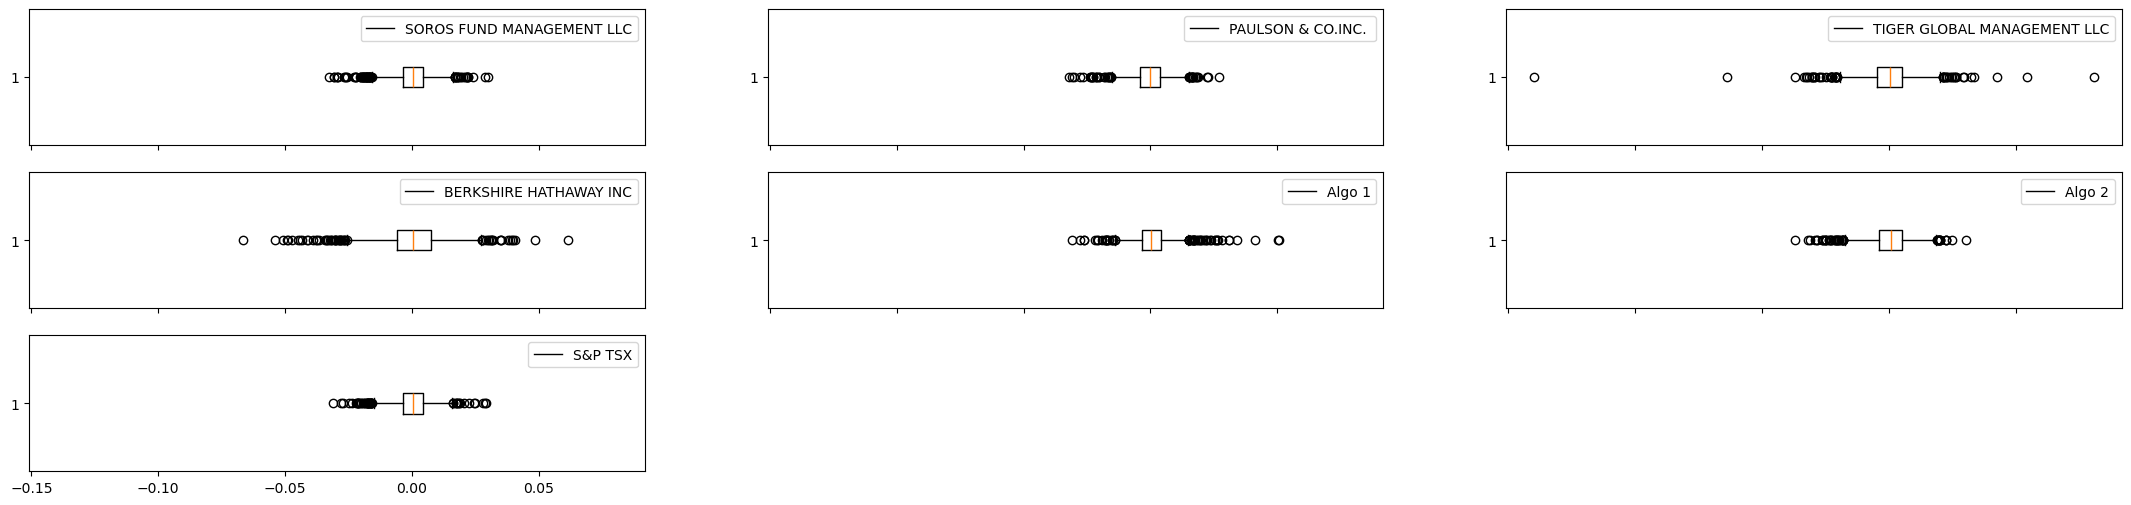

In [36]:
# Plot boxplots
boxplot_maker(combined_df)

### Calculate Standard Deviations

In [37]:
# Created a funciton called stdev_df which will return a dataframe of standard deviations for each portfolios
def stdev_df(df, annualized = False, sort = False):
    dataframe = pd.DataFrame(df.std(), columns = ['St_dev'])
    # If you want annualized standard deviation, set annualized to True and it will return annualized standard deviation using 252 trading days
    if annualized == True:
        dataframe = dataframe * np.sqrt(252)
    # If you want to sort the value, set sort to True
    if sort == True:
        dataframe.sort_values(by = ['St_dev'], ascending = False, inplace = True)
    return dataframe

In [38]:
# Show daily standard deviations of all portfolios
daily_std_df = stdev_df(combined_df, sort = True)
daily_std_df

St_dev
BERKSHIRE HATHAWAY INC       0.012826
TIGER GLOBAL MANAGEMENT LLC  0.010883
Algo 2                       0.008326
SOROS FUND MANAGEMENT LLC    0.007828
Algo 1                       0.007589
S&P TSX                      0.007034
PAULSON & CO.INC.            0.006982

### Determine which portfolios are riskier than the S&P TSX 60

In [39]:
# Show daily standard deviation of S&P TSX 60
snp_daily_stdev = daily_std_df.loc['S&P TSX']
snp_daily_stdev

St_dev    0.007034
Name: S&P TSX, dtype: float64

#### Determine which portfolios are riskier than the S&P TSX 60
Based on the daily_std_df dataframe, all the given portfolios are riskier than the S&P TSX 60 except for the Paulson & CO. Inc. portfolio because standard deviations of all the portfolios except for Paulson & Co. were higher than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [40]:
# Showing annualized standard deviation
annualized_std = stdev_df(combined_df, annualized = True, sort = True)
annualized_std

St_dev
BERKSHIRE HATHAWAY INC       0.203599
TIGER GLOBAL MANAGEMENT LLC  0.172759
Algo 2                       0.132177
SOROS FUND MANAGEMENT LLC    0.124259
Algo 1                       0.120470
S&P TSX                      0.111664
PAULSON & CO.INC.            0.110841

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [41]:
# Created a function called rolling_stdev_df which returns a dataframe of rolling standard deviations. Default rolling window is set to 21 days
def rolling_stdev_df(df, rolling = 21):
    dataframe = df.rolling(rolling).std().dropna()
    return dataframe

In [42]:
# Calculate rolling standard deviations of all portfolios
rolling_std = rolling_stdev_df(combined_df)
rolling_std.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-31                   0.005764            0.004641   
2015-04-01                   0.005744            0.004467   
2015-04-02                   0.005749            0.004502   
2015-04-06                   0.005792            0.004492   
2015-04-07                   0.005452            0.004385   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-31                     0.006731                0.007108  0.007866   
2015-04-01                     0.006750                0.007005  0.007886   
2015-04-02                     0.006739                0.006958  0.007601   
2015-04-06                     0.006786                0.006884  0.007648   
2015-04-07                     0.006486                0.006193  0.007531   

              Algo 2   S&P TSX  
Date                            
2015-03-31  0.006867  0.006583  
2015-04-01  0.006894  0.006404  
2015-04-02  0.006955  0.006509  
2015-04-06  0.007028  0.006596  
2015-04-07  0.006530  0.006295

Title of the graph: 21-day rolling standard deviations of portfolios and S&P TSX 60
X label: Date
Y label: 21-day rolling standard deviations


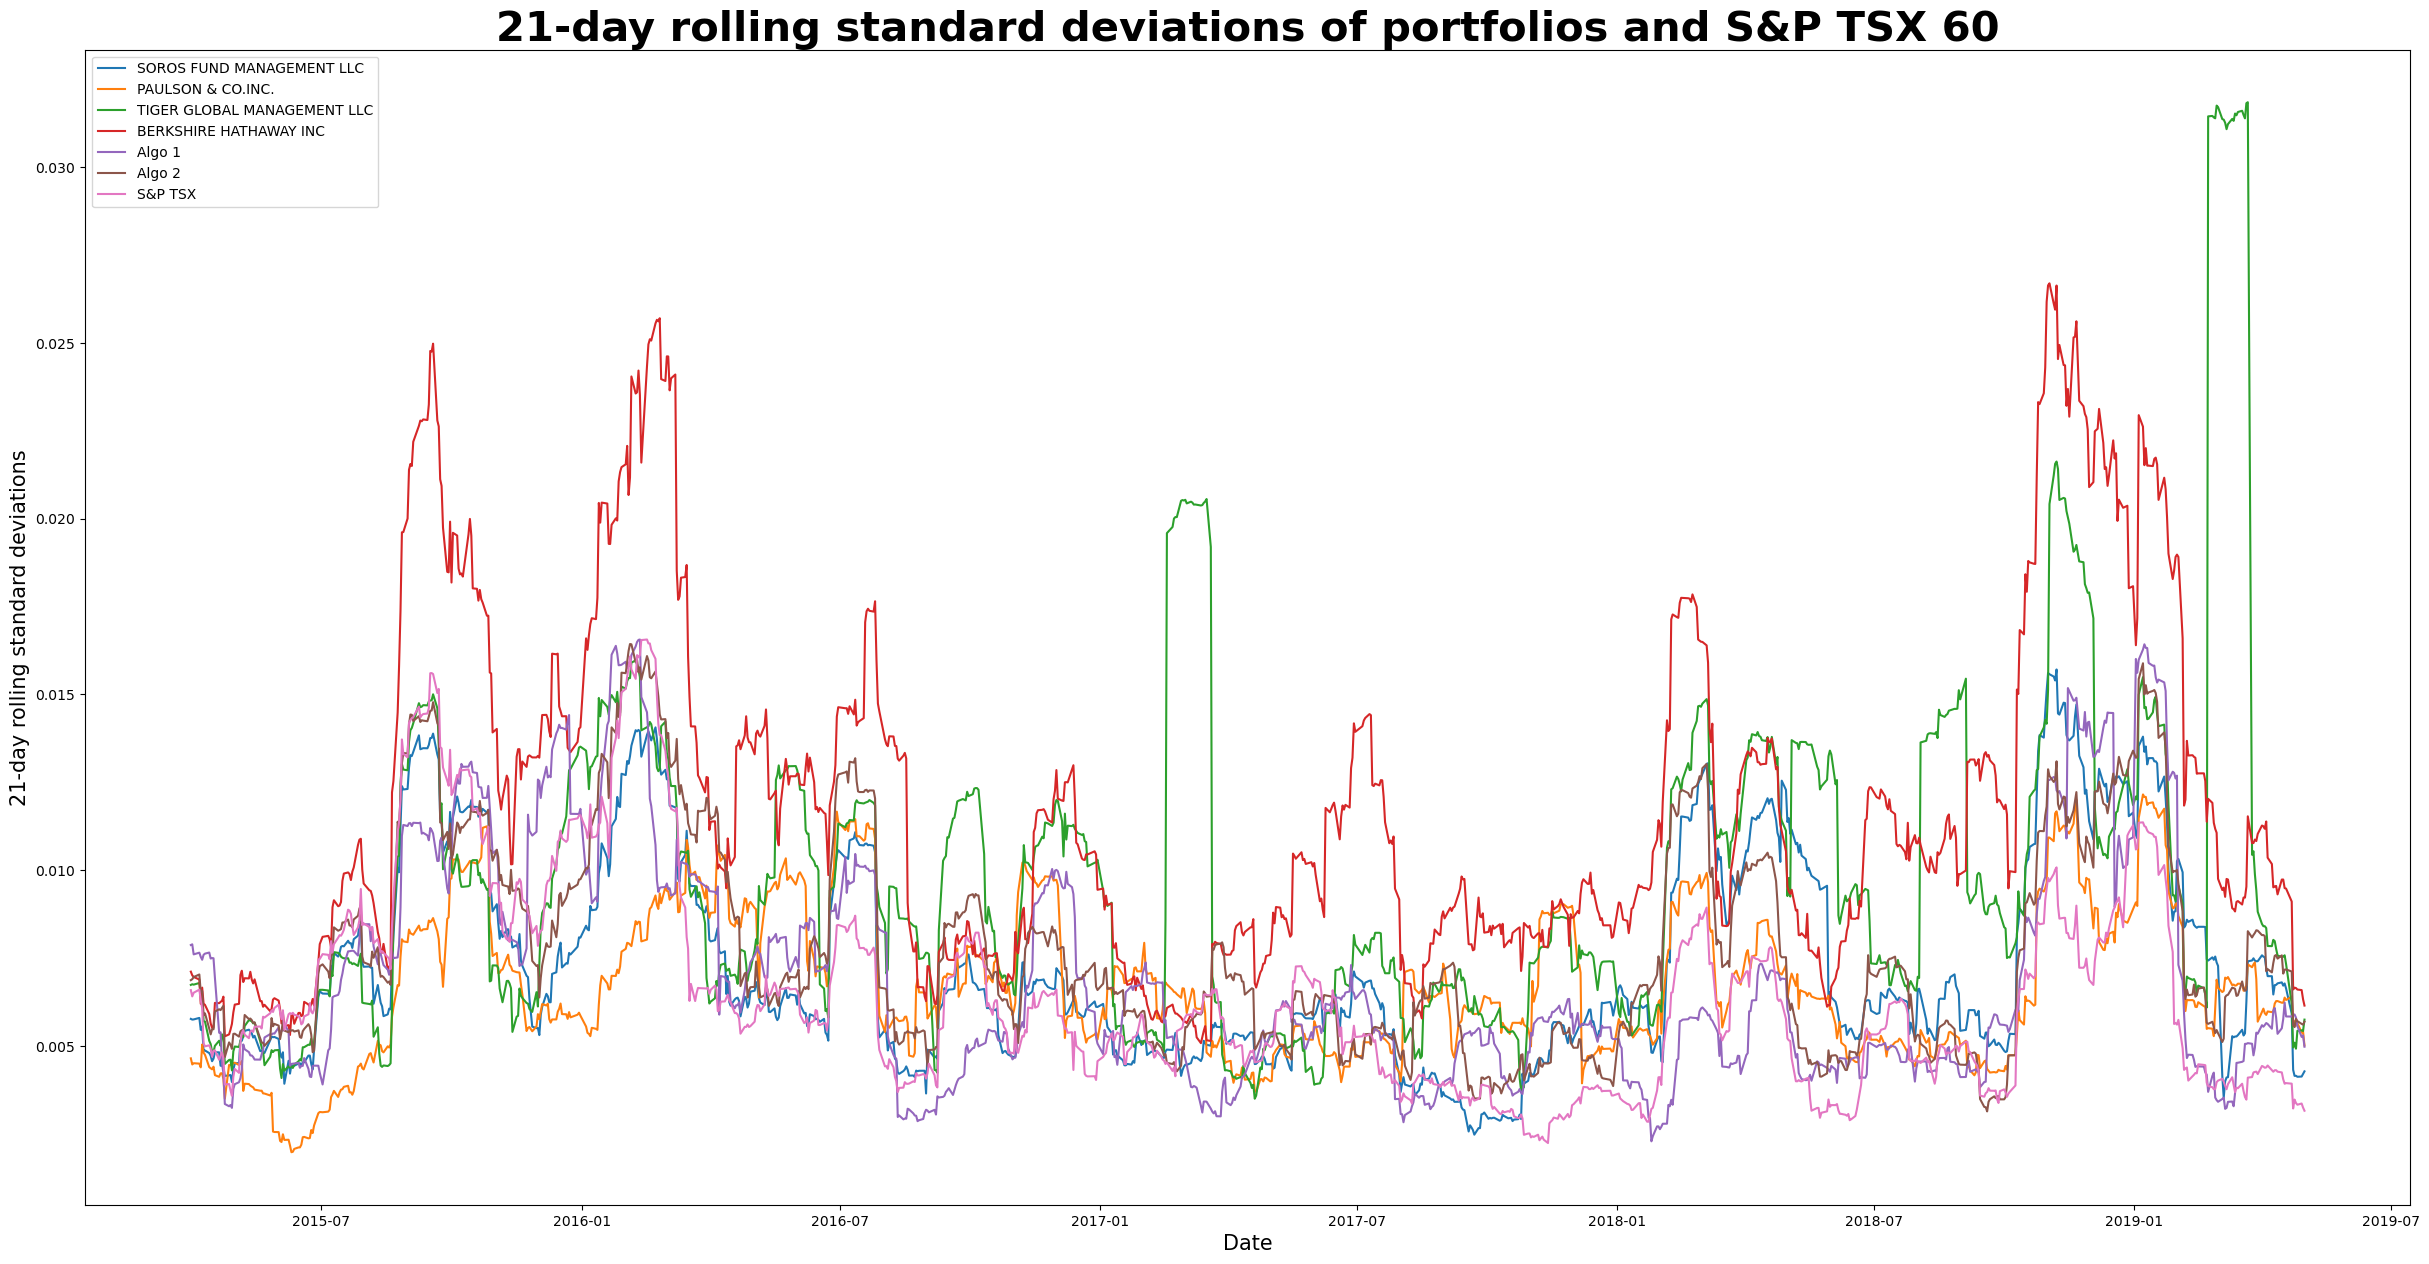

In [43]:
# Plot rolling standard deviations of all portfolios
graph_maker(rolling_std, '2015-03-03', '2019-05-01')

### Calculate and plot the correlation

In [44]:
# Created a function called corr_df which returns a correlation information of the portfolios.
def corr_df(df, graph = False):
    dataframe = df.corr()
    # When graph == True, it also shows a correlation matrix 
    if graph == True:
        sns.heatmap(dataframe, annot = True, fmt = '.2f', cmap = 'PiYG', linewidths = .5, square = True, annot_kws = {'fontsize':8, 'fontweight': 'bold'}, vmin = -1, vmax = 1)
    return dataframe

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
S&P TSX                                       0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2                                          0.506689   
S&P TSX                                         0.440583   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.750181  0.313795  0.826667   
PAULSON & CO.INC.                          0.540033  0.266363  0.674015   
TIGER GLOBAL MANAGEMENT LLC                0.423524  0.161236  0.506689   
BERKSHIRE HATHAWAY INC                     1.000000  0.289378  0.684609   
Algo 1                                     0.289378  1.000000  0.285455   
Algo 2                                     0.684609  0.285455  1.000000   
S&P TSX                                    0.557250  0.310276  0.737370   

                              S&P TSX  
SOROS FUND MANAGEMENT LLC    0.673930  
PAULSON & CO.INC.            0.486511  
TIGER GLOBAL MANAGEMENT LLC  0.440583  
BERKSHIRE HATHAWAY INC       0.557250  
Algo 1                       0.310276  
Algo 2                       0.737370  
S&P TSX                      1.000000

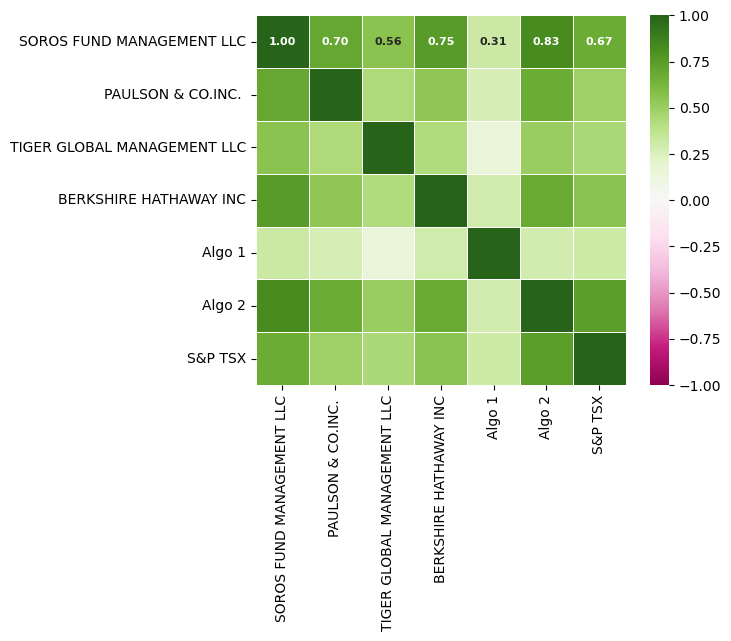

In [45]:
# Calculate correlation coefficients and plot heatmap
correlation = corr_df(combined_df, graph = True)
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

**Beta = covariance between portfolio and index / variance of index**

In [46]:
# Created a function called covar_df which calculates the covariance between each portfolios and S&P TSX 60
def covar_df(df, comparing_security = 'S&P TSX'):
    dataframe = df.cov()[[comparing_security]].rename(columns = {comparing_security: f'Covariance with {comparing_security}'})
    return dataframe

# Created a function called var_df which calculates variance of each portfolios and S&P TSX 60
def var_df(df):
    dataframe = pd.DataFrame(df.var(), columns = ['Variance'])
    return dataframe

In [47]:
# Calculate the covariance between each portfolios and S&P TSX 60
covariance_df = covar_df(combined_df)
covariance_df

Covariance with S&P TSX
SOROS FUND MANAGEMENT LLC                   0.000037
PAULSON & CO.INC.                           0.000024
TIGER GLOBAL MANAGEMENT LLC                 0.000034
BERKSHIRE HATHAWAY INC                      0.000050
Algo 1                                      0.000017
Algo 2                                      0.000043
S&P TSX                                     0.000049

In [48]:
# Calculating variance of S&P TSX 60
variance_df = var_df(combined_df)
variance_df.loc['S&P TSX']

Variance    0.000049
Name: S&P TSX, dtype: float64

In [49]:
# Created a function called beta_df which calculates beta of each portfolios
def beta_df(df, graph = False, sort = False):
    covariance = covar_df(df)
    variance = var_df(df)
    dataframe = pd.DataFrame(covariance / variance.loc['S&P TSX', 'Variance']).drop(['S&P TSX']).rename(columns = {'Covariance with S&P TSX': 'Beta'})
    if sort == True:
        dataframe.sort_values(by = ['Beta'], ascending = False, inplace = True)
    if graph == True:
        dataframe.plot.bar()
    return dataframe

Beta
BERKSHIRE HATHAWAY INC       1.016044
Algo 2                       0.872827
SOROS FUND MANAGEMENT LLC    0.749945
TIGER GLOBAL MANAGEMENT LLC  0.681640
PAULSON & CO.INC.            0.482925
Algo 1                       0.334745

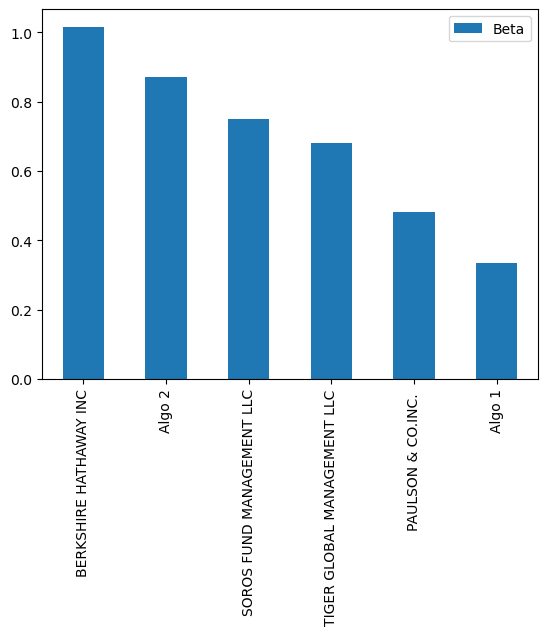

In [50]:
# Calculate beta for each portfolios and plot them on a bar chart.
# Remember that this beta is calculated for the period of 2015-03-31 to 2019-05-01
beta = beta_df(combined_df, graph = True, sort = True)
beta

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [51]:
# Calculate exponentially weighted average standard deviation using 21-day half life
combined_df.ewm(halflife = 21, min_periods = 21).std().dropna()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-31                   0.005767            0.004564   
2015-04-01                   0.005577            0.004414   
2015-04-02                   0.005415            0.004381   
2015-04-06                   0.005356            0.004314   
2015-04-07                   0.005227            0.004190   
...                               ...                 ...   
2019-04-25                   0.006819            0.006342   
2019-04-26                   0.006819            0.006448   
2019-04-29                   0.006708            0.006357   
2019-04-30                   0.006617            0.006270   
2019-05-01                   0.006636            0.006175   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-31                     0.006689                0.006958  0.007978   
2015-04-01                     0.006498                0.006810  0.007788   
2015-04-02                     0.006326                0.006608  0.007540   
2015-04-06                     0.006210                0.006504  0.007381   
2015-04-07                     0.006060                0.006317  0.007165   
...                                 ...                     ...       ...   
2019-04-25                     0.014811                0.010830  0.006526   
2019-04-26                     0.014764                0.010763  0.006433   
2019-04-29                     0.014575                0.010601  0.006378   
2019-04-30                     0.014336                0.010481  0.006310   
2019-05-01                     0.014166                0.010460  0.006208   

              Algo 2   S&P TSX  
Date                            
2015-03-31  0.006920  0.006464  
2015-04-01  0.006732  0.006310  
2015-04-02  0.006615  0.006294  
2015-04-06  0.006564  0.006223  
2015-04-07  0.006419  0.006188  
...              ...       ...  
2019-04-25  0.007500  0.004700  
2019-04-26  0.007418  0.004628  
2019-04-29  0.007304  0.004564  
2019-04-30  0.007200  0.004507  
2019-05-01  0.007238  0.004546  

[1009 rows x 7 columns]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In class, we leared that the formula for annualized Sharpe Ratio is:

Sharpe Ratio = ((portfolio mean - risk free mean) * 252) / (portfolio standard deviation * sqrt(252))



In [52]:
# Created a function called sharpe_ratio which calculates sharpe ratio of each portfolios.
# In here, the risk free rate was not specified so I used S&P TSX 60 as risk free rate.
def sharpe_ratio_df(df, graph = False, sort = False):
    dataframe = pd.DataFrame(((df.mean().iloc[:] - df['S&P TSX'].mean()) * 252) / (df.std().iloc[:] * np.sqrt(252)), columns = ['sharpe ratio'])
    dataframe.drop(['S&P TSX'], inplace = True)
    if sort == True:
        dataframe.sort_values(by = ['sharpe ratio'], ascending = False, inplace = True)
    if graph == True:
        dataframe.plot.bar()
    return dataframe

sharpe ratio
Algo 1                           1.310258
BERKSHIRE HATHAWAY INC           0.359795
Algo 2                           0.231615
SOROS FUND MANAGEMENT LLC        0.110980
TIGER GLOBAL MANAGEMENT LLC     -0.270851
PAULSON & CO.INC.               -0.744596

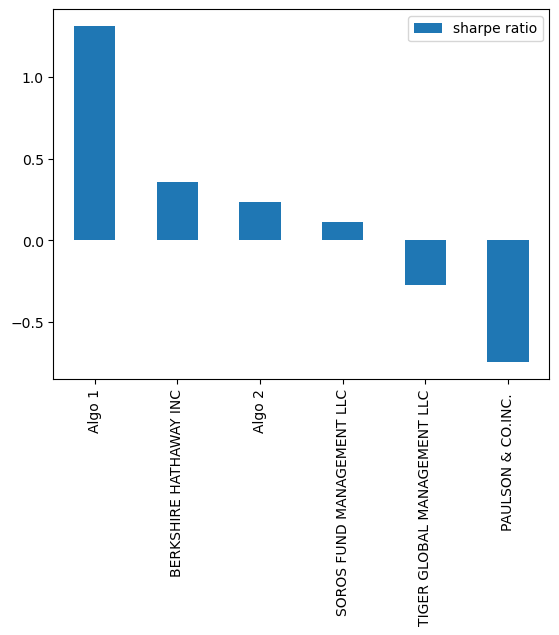

In [53]:
# Calculate sharpe ratio and plot bar chart
sharpe_ratio = sharpe_ratio_df(combined_df, True, True)
sharpe_ratio

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

**Based on the Sharpe ratio, Algo 1 did outperform both S&P TSX 60 and whales portfolios.
However, Algo 2 was able to outperform S&P TSX 60, but not all the whales portfolio. For example, based on the annualized Sharpe ratio, Algo 2 was not able to outperform Berkshire Hathaway Inc portfolio.**

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

**The data that I obtained from google finance contains closing price information for 2017-01-04 to 2019-05-01 <br>
The stocks that I chose are Apple (AAPL), Adobe (ADBE), Microsoft (MSFT), Netflix (NFLX), and Nike (NKE)**

In [54]:
tickers = ['AAPL', 'ADBE', 'MSFT', 'NFLX', 'NKE']


# Created a function called dataframe_gatherer which will combine all the separate stock data into one dataframe. Each column will have the stock symbol as its name
def dataframe_gatherer(ticker_list):
    df_list = []
    for i in ticker_list:
        df = pd.read_csv(f'Resources/{i}.csv')
        df.set_index(pd.to_datetime(df['Date']).dt.date, inplace = True)
        df.sort_index(inplace = True)
        df.drop('Date', axis = 1, inplace = True)
        df.rename(columns = {'Close': f'{i}'}, inplace = True)
        df_list.append(df)
    dataframe = pd.concat(df_list, axis = 'columns', join = 'inner')
    return dataframe

In [55]:
# Created variable called my_portfolio which contains dataframe of all stock data
my_portfolio = dataframe_gatherer(tickers)

In [56]:
# Calculating daily returns and dropping any null values
my_portfolio = my_portfolio.pct_change().dropna()

In [57]:
# Displaying sample data
my_portfolio.sample(5)

AAPL      ADBE      MSFT      NFLX       NKE
Date                                                        
2017-06-14 -0.009823 -0.006039 -0.005379 -0.003405  0.006444
2017-11-16  0.012065  0.012328  0.002651  0.017645  0.010595
2017-11-17 -0.005610 -0.000329 -0.009615 -0.011815  0.034248
2018-08-01  0.059071  0.013610  0.001885  0.002756  0.008191
2017-05-05  0.016653  0.001709  0.002761 -0.004134 -0.009547

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [58]:
# Setting weights in equal value
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
# Calculating portfolio return
my_portfolio_return = pd.DataFrame(my_portfolio.dot(weights), columns = ['My return'])
# Displaying sample data
my_portfolio_return.sample(5)

My return
Date                 
2017-11-17   0.001376
2019-03-19  -0.002277
2019-02-15   0.001945
2017-02-15   0.005276
2018-07-30  -0.019242

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [59]:
# Joined my portfolio returns to the original returns Dataframe
# Since my portfolio only has data from 2017 to 2019, I did inner join so that I am only comparing dates where my portfolio return data exists
all_combined = pd.merge(left = combined_df, right = my_portfolio_return, how = 'inner', left_index = True, right_index = True)

In [60]:
# Check the result
all_combined.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2017-01-04                   0.011581            0.007029   
2017-01-05                   0.003079            0.004107   
2017-01-06                   0.003561           -0.013250   
2017-01-09                  -0.000458            0.002007   
2017-01-10                  -0.001490            0.000394   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2017-01-04                    -0.001011                0.012204  0.012510   
2017-01-05                    -0.004264                0.016092 -0.003955   
2017-01-06                    -0.001213                0.005667 -0.000364   
2017-01-09                    -0.004540               -0.002642  0.002775   
2017-01-10                    -0.000718                0.010586  0.007669   

              Algo 2   S&P TSX  My return  
Date                                       
2017-01-04  0.014701  0.007383   0.007380  
2017-01-05 -0.001872  0.004500   0.008036  
2017-01-06  0.000051 -0.005808   0.010592  
2017-01-09 -0.006277 -0.006911  -0.000456  
2017-01-10  0.006618  0.002426  -0.003064

In [61]:
# Make sure there are no null data
all_combined.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
My return                      0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [62]:
# Calculating annualized daily return of all the portfolios including my portfolio
all_std = stdev_df(all_combined, annualized = True)
all_std

St_dev
SOROS FUND MANAGEMENT LLC    0.121924
PAULSON & CO.INC.            0.106148
TIGER GLOBAL MANAGEMENT LLC  0.187323
BERKSHIRE HATHAWAY INC       0.194911
Algo 1                       0.105662
Algo 2                       0.118886
S&P TSX                      0.088954
My return                    0.209572

### Calculate and plot rolling `std` with 21-day window

In [63]:
# Calculating 21 days rolling standard deviation of all the portfolios including my portfolio
rolling_std = rolling_stdev_df(all_combined)
rolling_std.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2017-02-02                   0.005154            0.007176   
2017-02-03                   0.004736            0.007045   
2017-02-06                   0.004832            0.007070   
2017-02-07                   0.004818            0.006852   
2017-02-08                   0.004864            0.006909   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2017-02-02                     0.005114                0.006422  0.007369   
2017-02-03                     0.005361                0.006176  0.006800   
2017-02-06                     0.005446                0.005762  0.006764   
2017-02-07                     0.005429                0.005739  0.006777   
2017-02-08                     0.005300                0.005835  0.006761   

              Algo 2   S&P TSX  My return  
Date                                       
2017-02-02  0.005702  0.005248   0.005851  
2017-02-03  0.005099  0.005106   0.005803  
2017-02-06  0.005096  0.005003   0.005684  
2017-02-07  0.005119  0.004880   0.005462  
2017-02-08  0.004887  0.004661   0.005531

Title of the graph: 21-day rolling standard deviations of portfolios and S&P TSX 60
X label: Date
Y label: 21-day rolling standard deviation


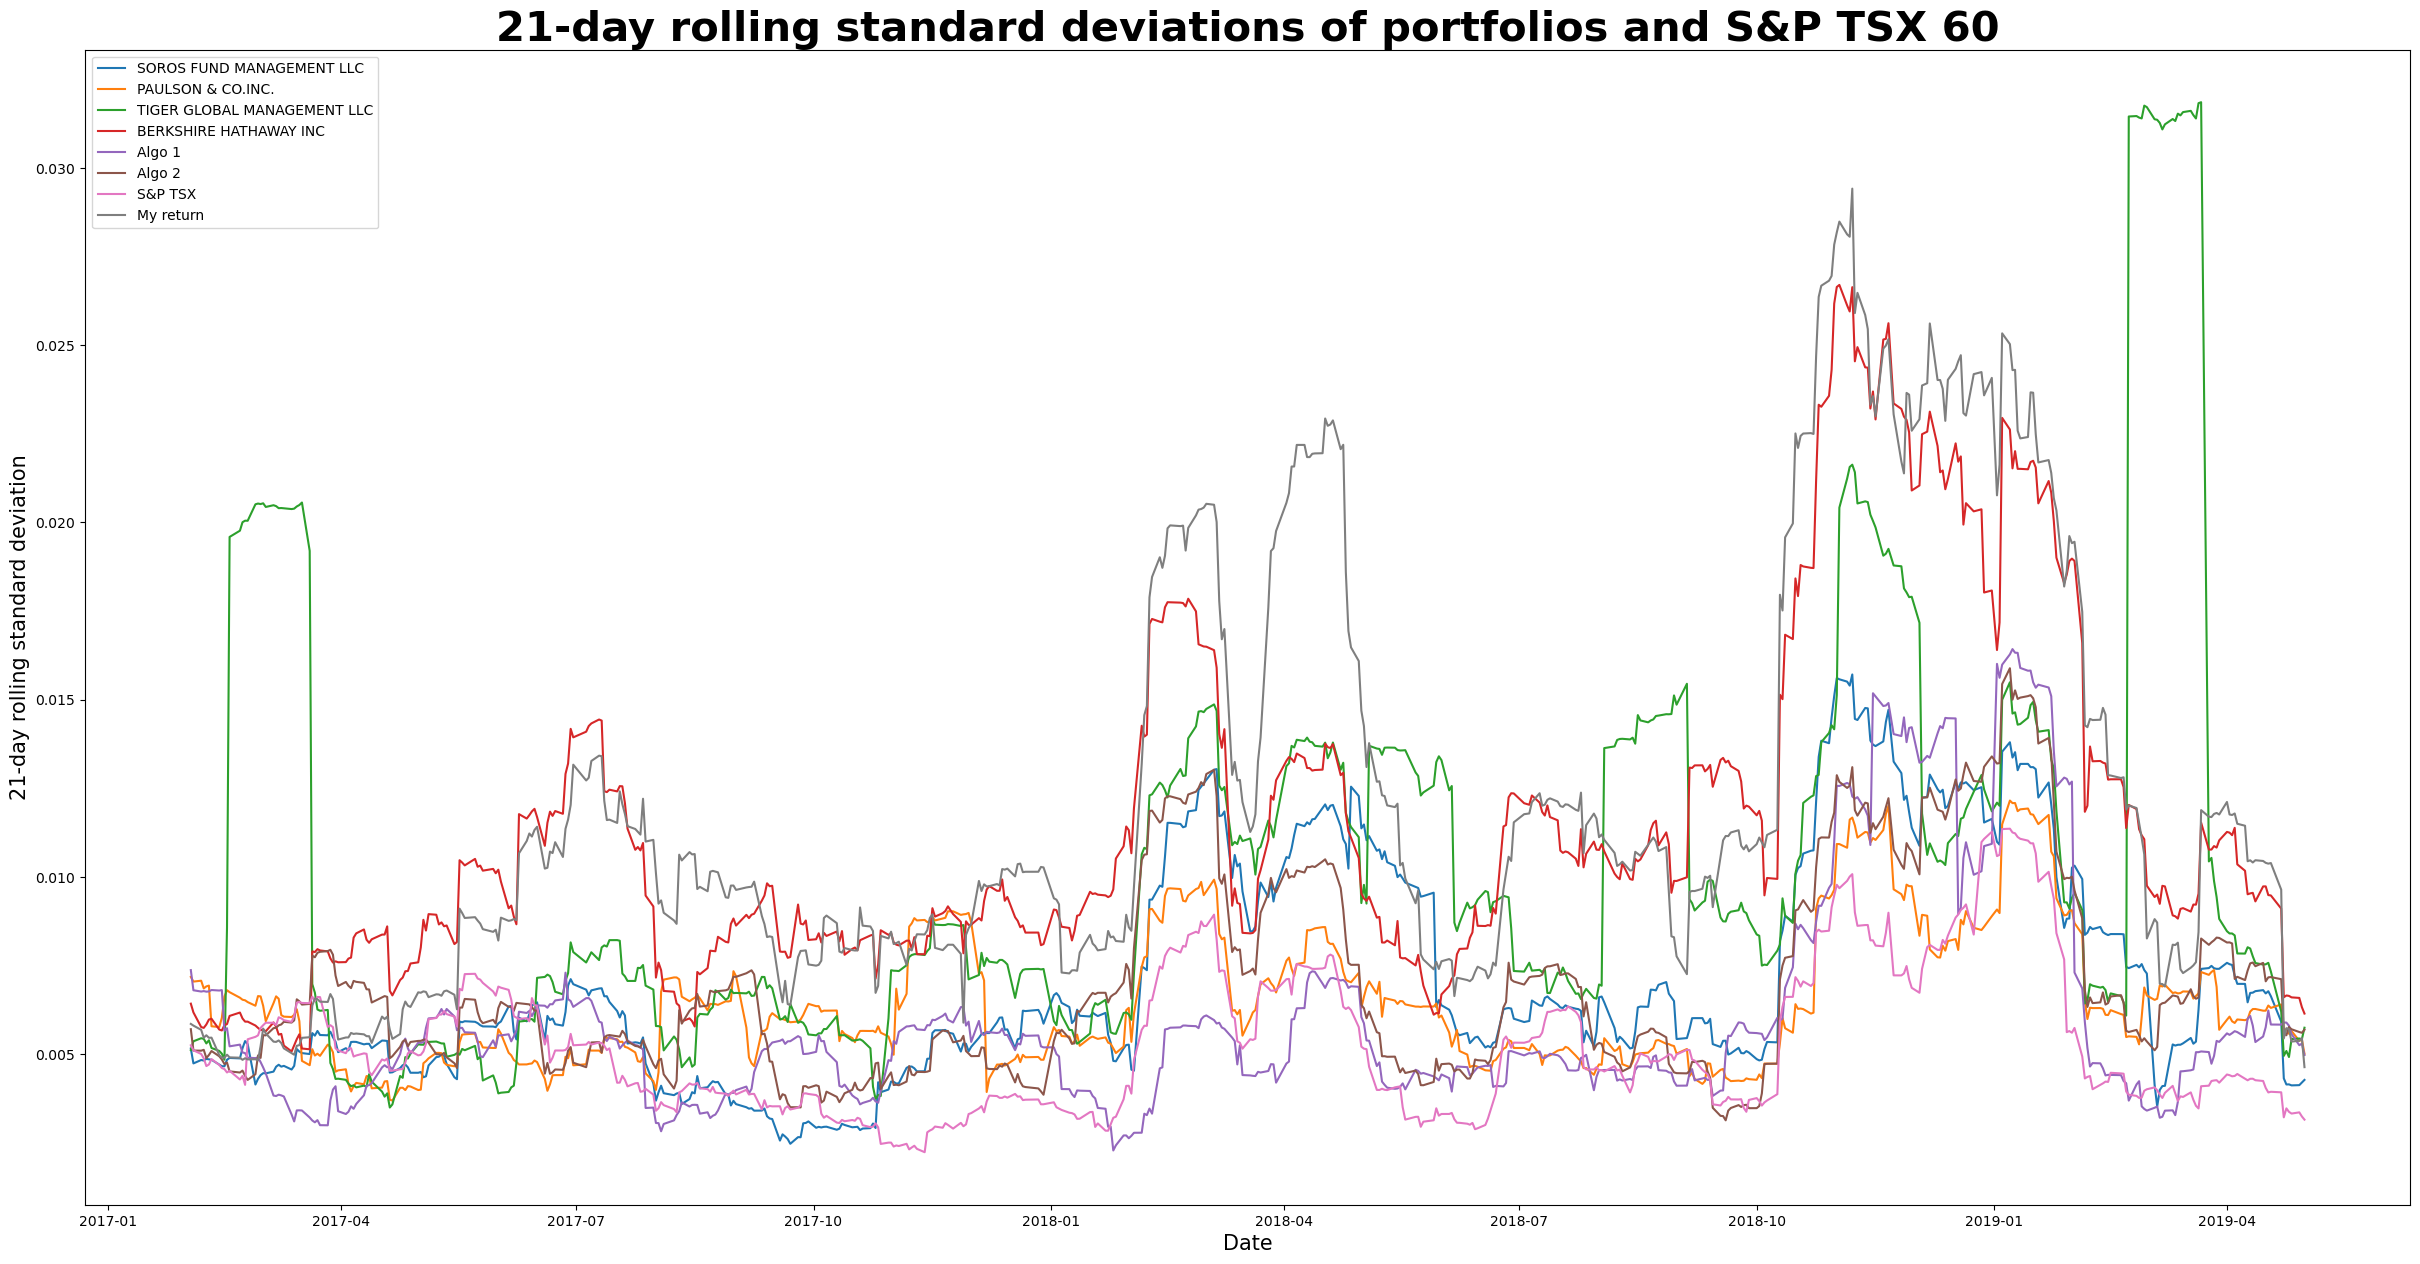

In [64]:
# Plot rolling standard deviation
graph_maker(rolling_std, '2017-02-02', '2019-05-01')

### Calculate and plot the correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.676258   
PAULSON & CO.INC.                             0.676258            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.481812            0.417147   
BERKSHIRE HATHAWAY INC                        0.750479            0.554358   
Algo 1                                        0.258004            0.268970   
Algo 2                                        0.793306            0.711971   
S&P TSX                                       0.629754            0.526272   
My return                                     0.689955            0.531054   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.481812   
PAULSON & CO.INC.                               0.417147   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.337848   
Algo 1                                          0.079575   
Algo 2                                          0.427083   
S&P TSX                                         0.354124   
My return                                       0.387078   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.750479  0.258004  0.793306   
PAULSON & CO.INC.                          0.554358  0.268970  0.711971   
TIGER GLOBAL MANAGEMENT LLC                0.337848  0.079575  0.427083   
BERKSHIRE HATHAWAY INC                     1.000000  0.222786  0.730203   
Algo 1                                     0.222786  1.000000  0.284497   
Algo 2                                     0.730203  0.284497  1.000000   
S&P TSX                                    0.588969  0.260889  0.713695   
My return                                  0.817339  0.216079  0.718190   

                              S&P TSX  My return  
SOROS FUND MANAGEMENT LLC    0.629754   0.689955  
PAULSON & CO.INC.            0.526272   0.531054  
TIGER GLOBAL MANAGEMENT LLC  0.354124   0.387078  
BERKSHIRE HATHAWAY INC       0.588969   0.817339  
Algo 1                       0.260889   0.216079  
Algo 2                       0.713695   0.718190  
S&P TSX                      1.000000   0.568801  
My return                    0.568801   1.000000

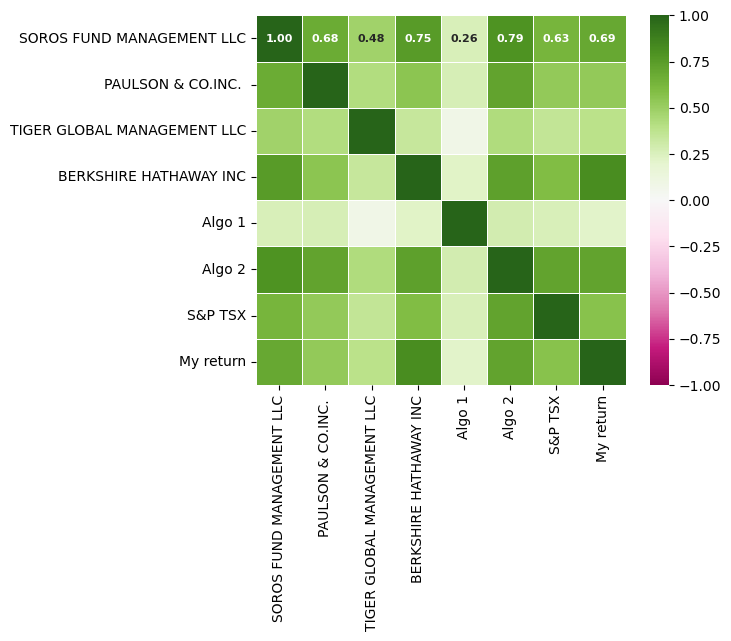

In [65]:
# Calculate and plot correlation matrix
all_corr = corr_df(all_combined, True)
all_corr

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [66]:
# Calculating 60-day rolling covariance of all the portfolios comparing to S&P TSX 60
rolling_covariance = all_combined.rolling(window=60).cov().dropna()
rolling_covariance = rolling_covariance[['S&P TSX']].reset_index().set_index('Date').pivot(columns = 'level_1', values = 'S&P TSX')
rolling_covariance.drop(['S&P TSX'], axis = 1, inplace = True)
rolling_covariance.head()

level_1       Algo 1    Algo 2  BERKSHIRE HATHAWAY INC  My return  \
Date                                                                
2017-03-30  0.000007  0.000024                0.000018   0.000015   
2017-03-31  0.000006  0.000022                0.000017   0.000014   
2017-04-03  0.000006  0.000022                0.000016   0.000014   
2017-04-04  0.000006  0.000022                0.000015   0.000014   
2017-04-05  0.000006  0.000021                0.000015   0.000014   

level_1     PAULSON & CO.INC.   SOROS FUND MANAGEMENT LLC  \
Date                                                        
2017-03-30            0.000012                   0.000014   
2017-03-31            0.000011                   0.000013   
2017-04-03            0.000011                   0.000012   
2017-04-04            0.000010                   0.000013   
2017-04-05            0.000010                   0.000013   

level_1     TIGER GLOBAL MANAGEMENT LLC  
Date                                     
2017-03-30                     0.000008  
2017-03-31                     0.000008  
2017-04-03                     0.000008  
2017-04-04                     0.000008  
2017-04-05                     0.000008

In [67]:
# Calculating 60-day rolling variance of S&P TSX 60
rolling_variance = all_combined.rolling(window = 60).var().dropna()
rolling_variance = pd.DataFrame(rolling_variance.loc[:,'S&P TSX'])
#rolling_variance = rolling_variance.loc[:,'S&P TSX']
rolling_variance.head()

S&P TSX
Date                
2017-03-30  0.000030
2017-03-31  0.000029
2017-04-03  0.000029
2017-04-04  0.000028
2017-04-05  0.000028

In [68]:
# Calculating 60-day rolling beta
rolling_beta = rolling_covariance.div(rolling_variance['S&P TSX'], axis = 0)
rolling_beta.head()

level_1       Algo 1    Algo 2  BERKSHIRE HATHAWAY INC  My return  \
Date                                                                
2017-03-30  0.243694  0.799096                0.599822   0.506371   
2017-03-31  0.197494  0.758402                0.577878   0.502902   
2017-04-03  0.208093  0.762299                0.545273   0.483860   
2017-04-04  0.198561  0.760806                0.531334   0.506546   
2017-04-05  0.222763  0.761604                0.533865   0.518714   

level_1     PAULSON & CO.INC.   SOROS FUND MANAGEMENT LLC  \
Date                                                        
2017-03-30            0.412806                   0.476289   
2017-03-31            0.399132                   0.445928   
2017-04-03            0.384967                   0.436893   
2017-04-04            0.338272                   0.450393   
2017-04-05            0.358746                   0.469650   

level_1     TIGER GLOBAL MANAGEMENT LLC  
Date                                     
2017-03-30                     0.263254  
2017-03-31                     0.282529  
2017-04-03                     0.298041  
2017-04-04                     0.290728  
2017-04-05                     0.274251

Title of the graph: 60-day rolling beta of portfolios
X label: Date
Y label: 60-day rolling beta


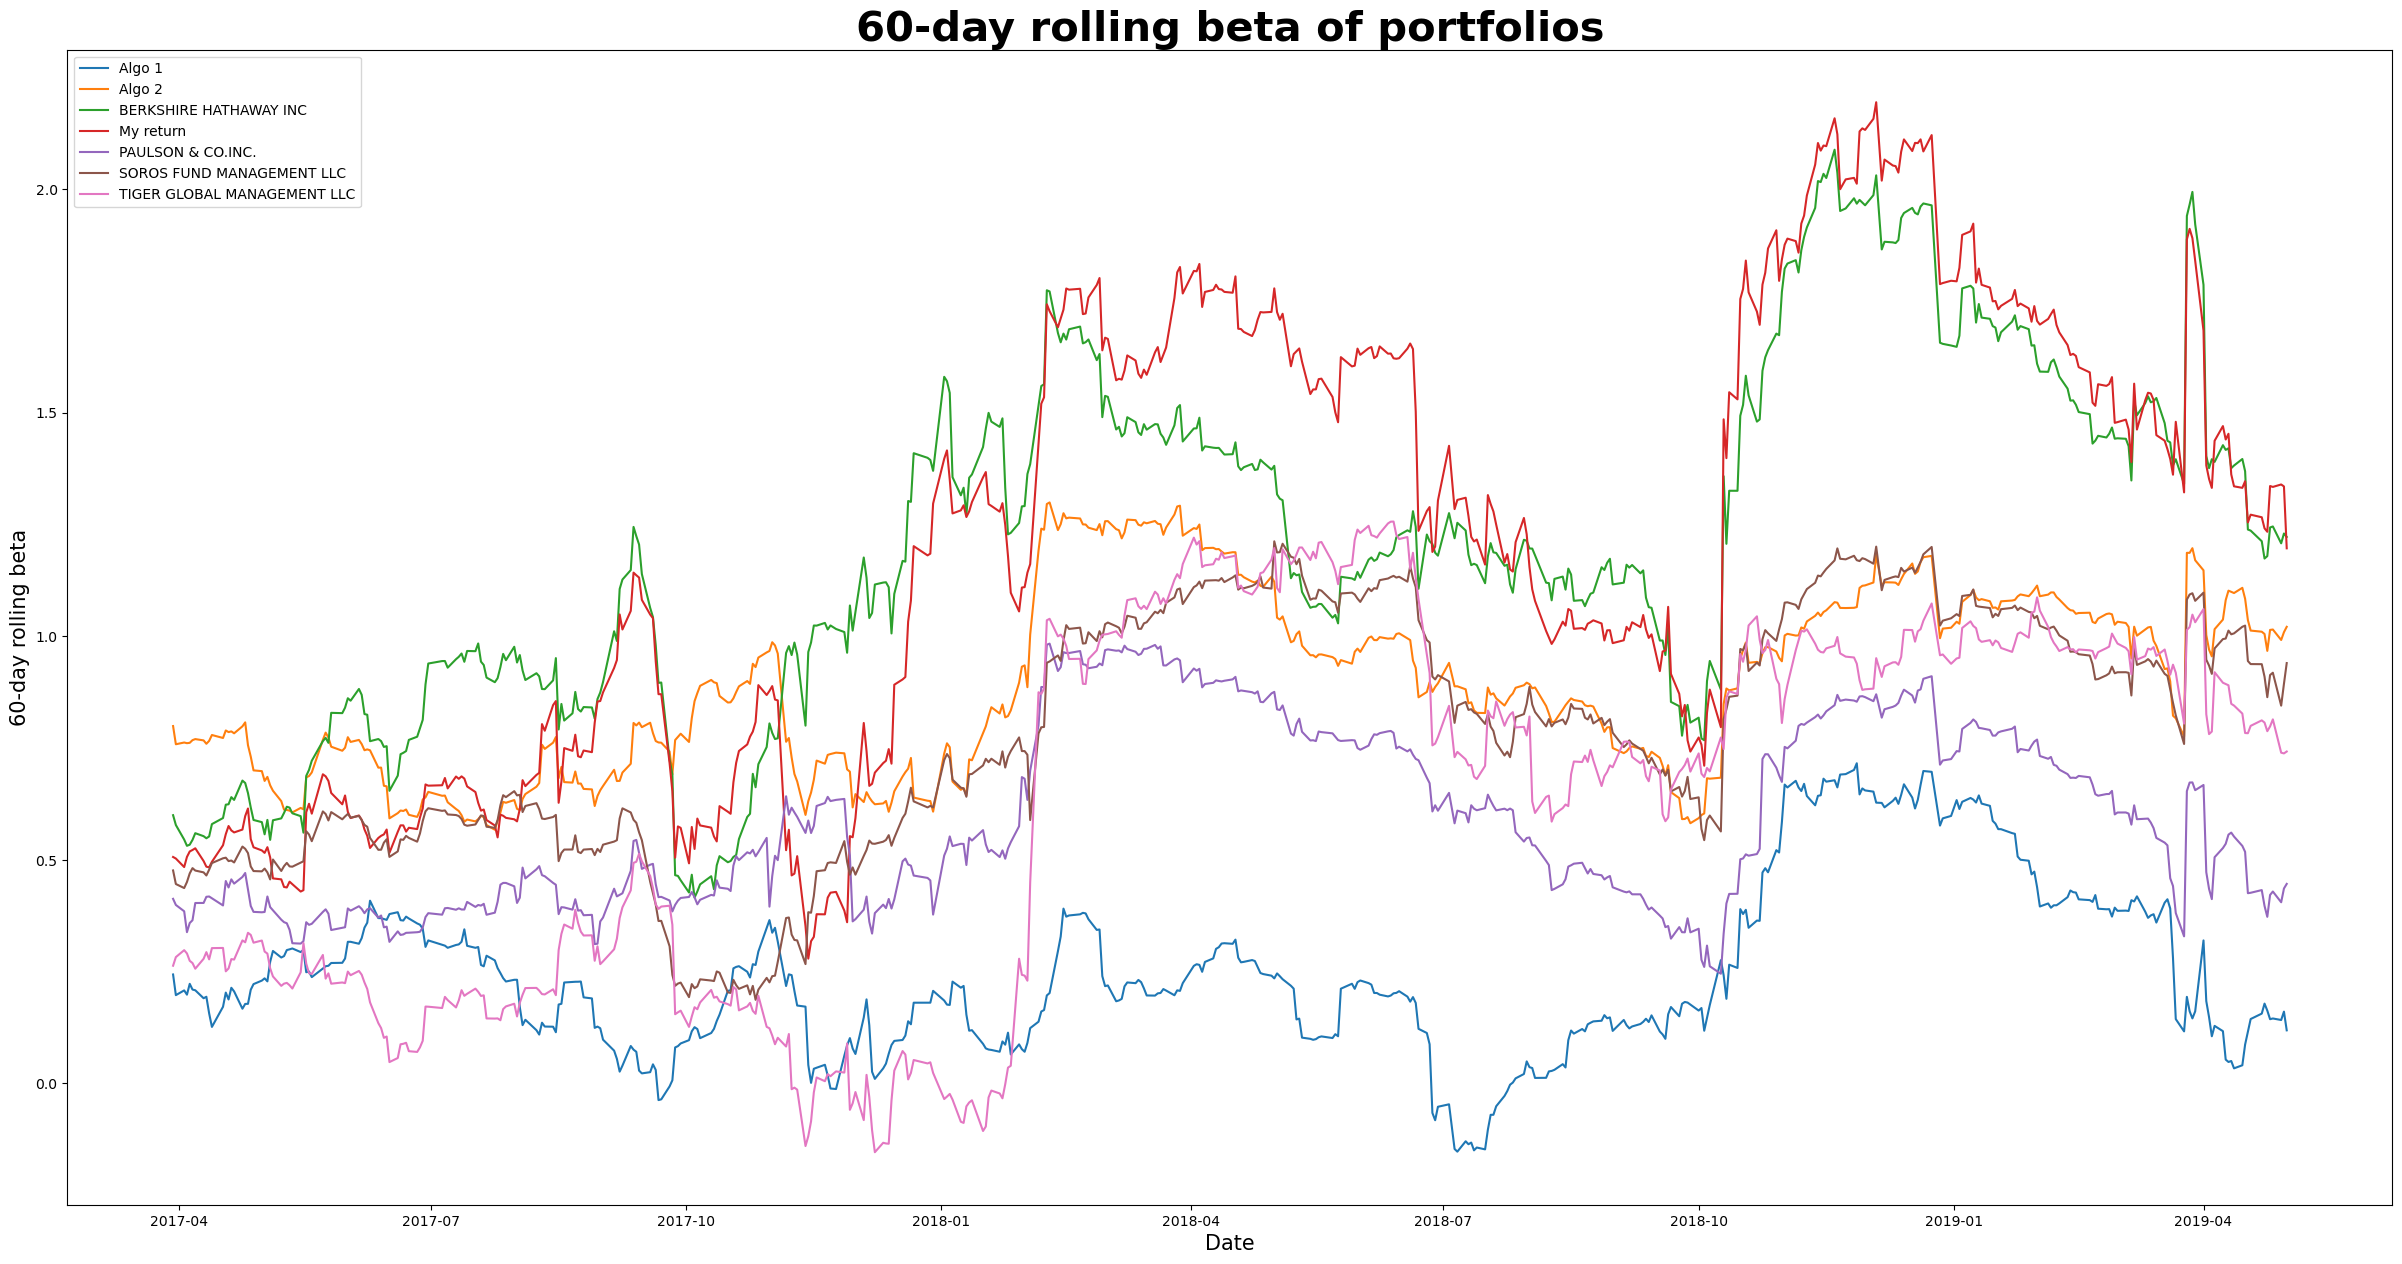

In [69]:
# Plotting the rolling beta for all the portfolios
graph_maker(rolling_beta)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

sharpe ratio
My return                        1.527920
Algo 1                           1.015109
BERKSHIRE HATHAWAY INC           0.919398
Algo 2                           0.319897
SOROS FUND MANAGEMENT LLC        0.244145
PAULSON & CO.INC.               -0.758616
TIGER GLOBAL MANAGEMENT LLC     -1.067832

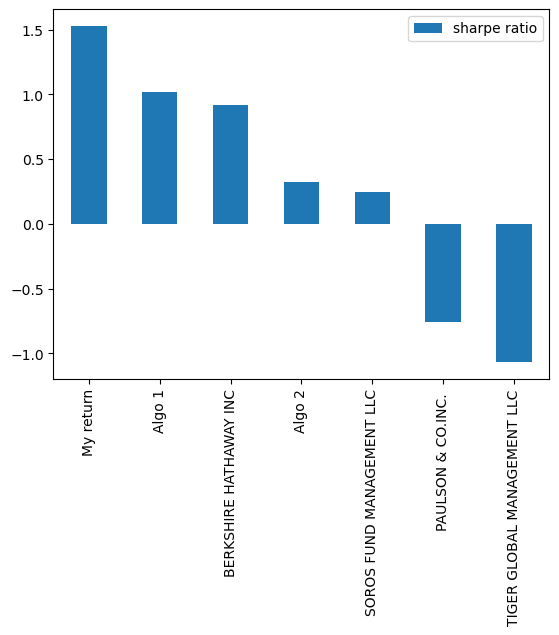

In [70]:
# Calculated annualized sharpe ratios for all the portfolios and visualized them as a bar plot
all_sharpe = sharpe_ratio_df(all_combined, True, True)
all_sharpe

### How does your portfolio do?

**My portfolio's performance was the best out of all the other portfolios for the period of 2017-01-01 to 2019-05-01.** <br>
**It's Sharpe ratio was the highest out of all the other portfolios.**<br>
**In terms of its risk, it resembled the Berkshire Hathaway's portfolio in both 60-day rolling standard deviation pattern and annualized standard deviation.**<br>
**Also, my portfolio's 60-days rolling beta resembled Berkshire Hathaway's pattern.** <br>
**Lastly, my portfolio's cumulative return was also the best out of all the other portfolios according to the cumulative returns graph below**

Title of the graph: Cumulative returns of portfolios and S&P TSX 60
X label: Date
Y label: Cumulative returns


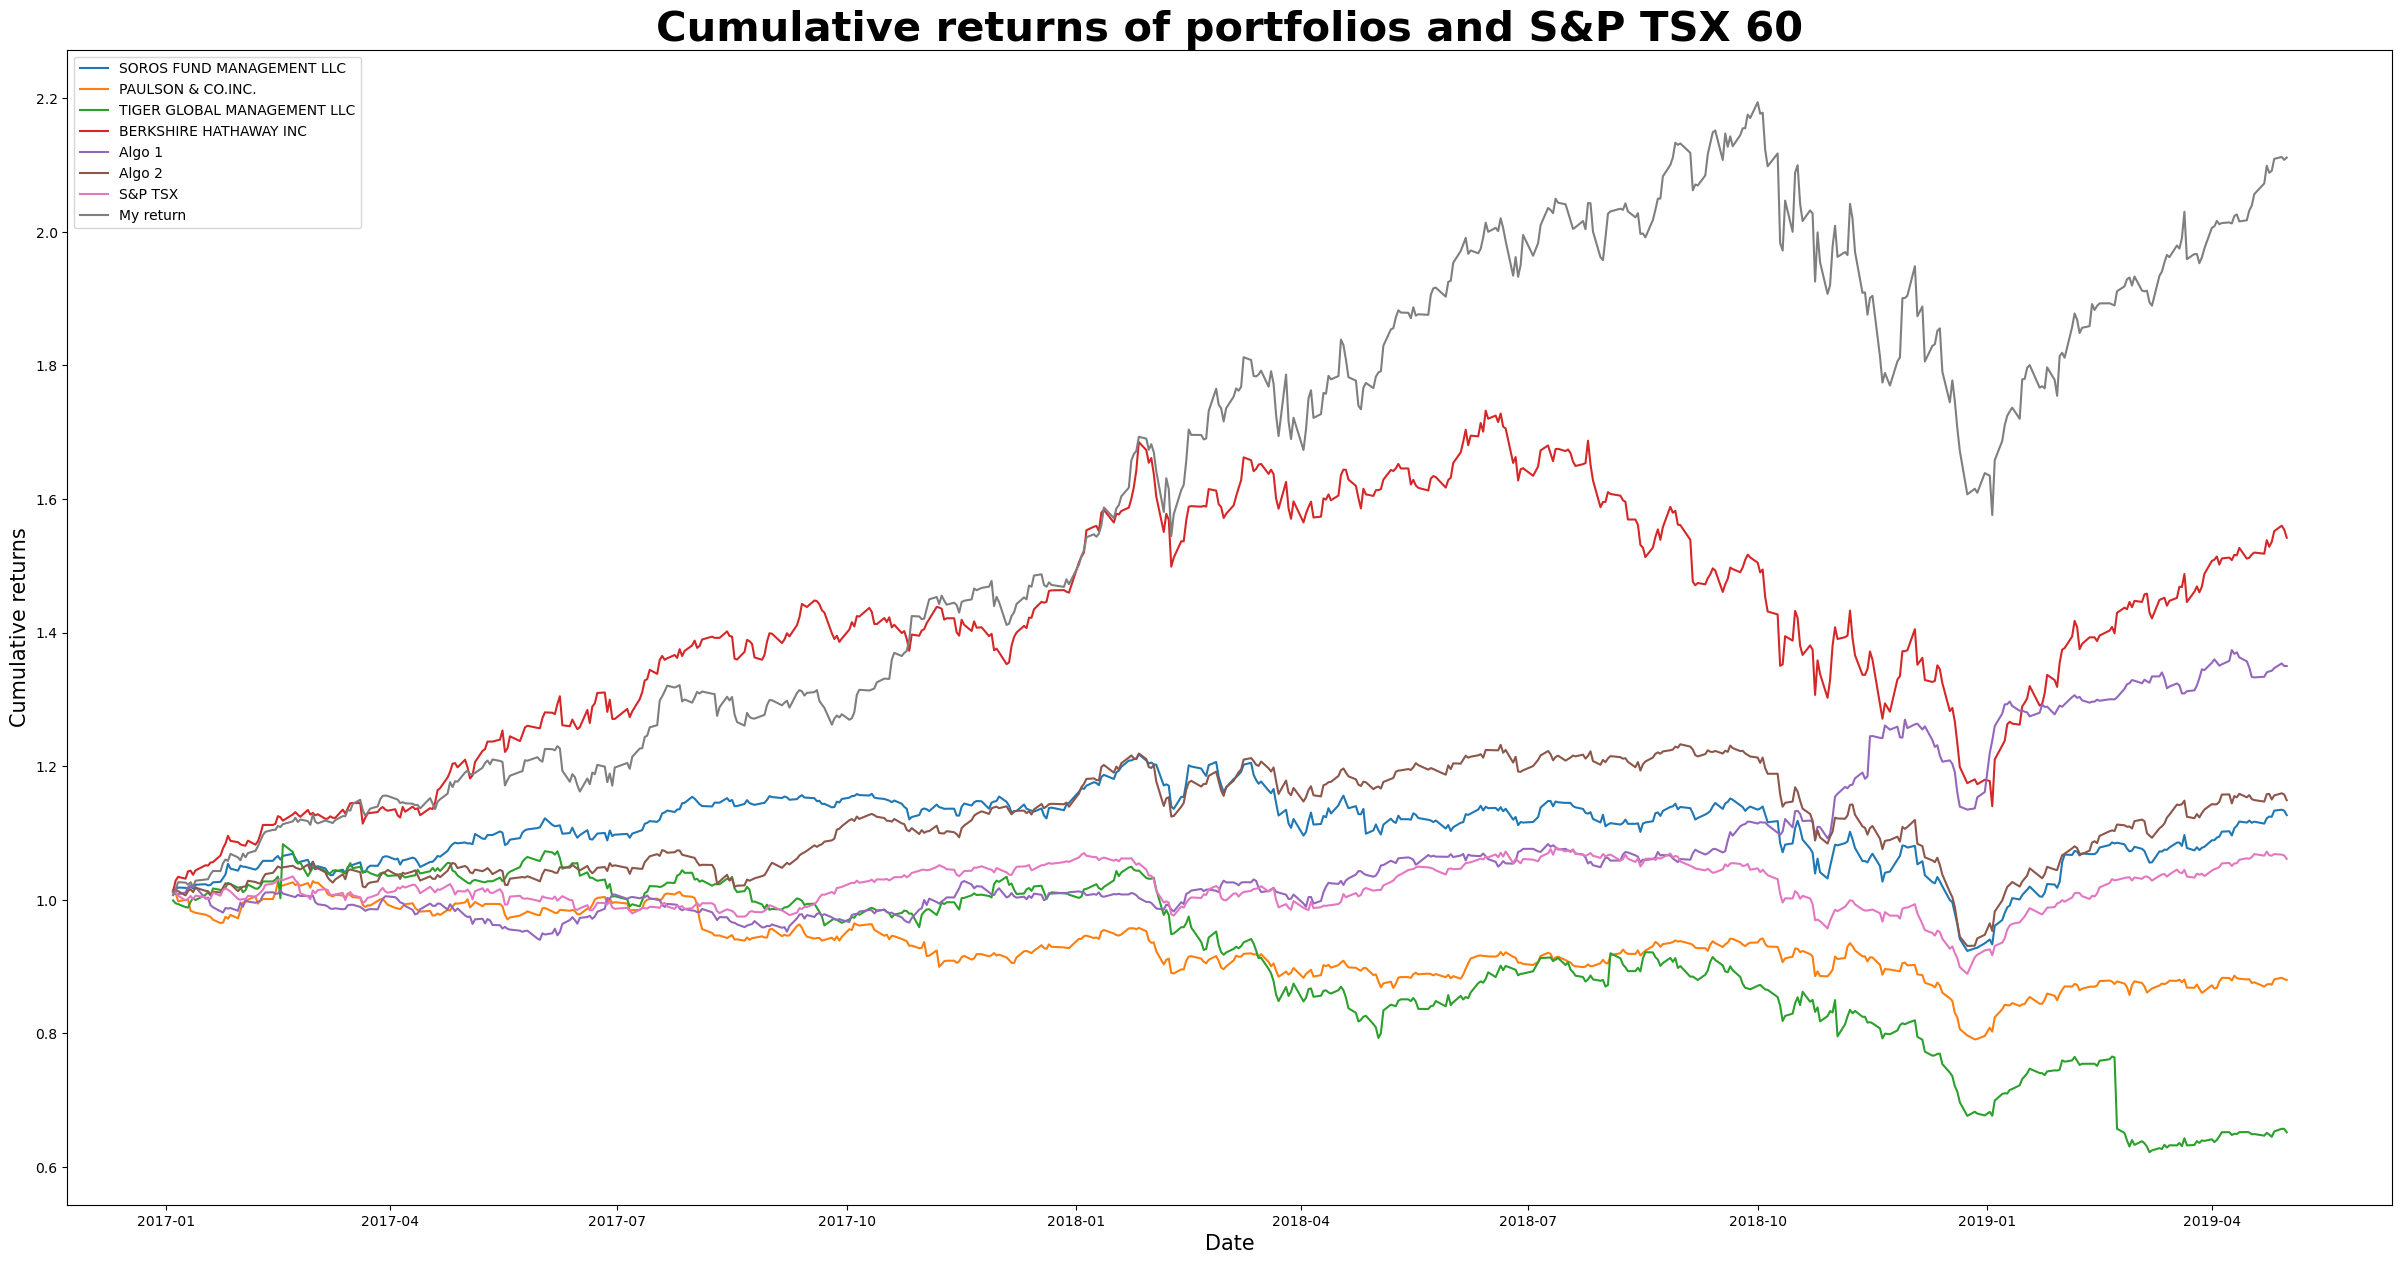

In [71]:
cumprod_graph_maker(all_combined, '2017-01-04', '2019-05-01')